<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui - Cedric Goeury&nbsp;</span><br/>
___

This tutorial is intended for people who want an example showing how to compute the area of the wet section along a polygonal chain.

In [1]:
from data_manip.computation.polyline_integrals import wet_area_2d

The module 'polyline_integrals' is located in the '$HOMETEL/scripts/python3/data_manip/computation' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH.


# The wet section area computation test case

In [2]:
import numpy as np
from utils.geometry import get_norm2
from utils.exceptions import TelemacException

Here we fill an array with coordinates for a polyline.
The aim here is to use the extraction instead when it is ready.

In [3]:
polyline_coords = np.array([[0., 0.], [0.1, 0.], [0.2, 0.], [0.3, 0.], [0.4, 0.], [0.5, 0.]])

Here we fill an array with the value of the water depth at each point of the polygonal chain. The aim here is to use the extraction instead when it is ready. We create an array of 1 line with 6 entries equal to 1.


In [4]:
water_depth = np.ones((6, 1))

Here we compute the area of the wet section using the wet_area_2d function. It integrates H along the polygonal chain.


In [5]:
area = wet_area_2d(polyline_coords, water_depth)
print(area)

[0.5]


The result is correct obviously.

# 2. Wet section area computation using the confluence T2D result file

We need some additional imports to open the file, define the polygonal chain and extract the data.

In [6]:
from os import chdir, environ, path
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np

First, define the Telemac2D result file to be used.

In [7]:
file_name = path.join(environ['HOMETEL'], 
                          'examples', 
                          'telemac2d', 
                          'confluence',
                          'f2d_confluence.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

We can visualise the case through a 2d plot first.

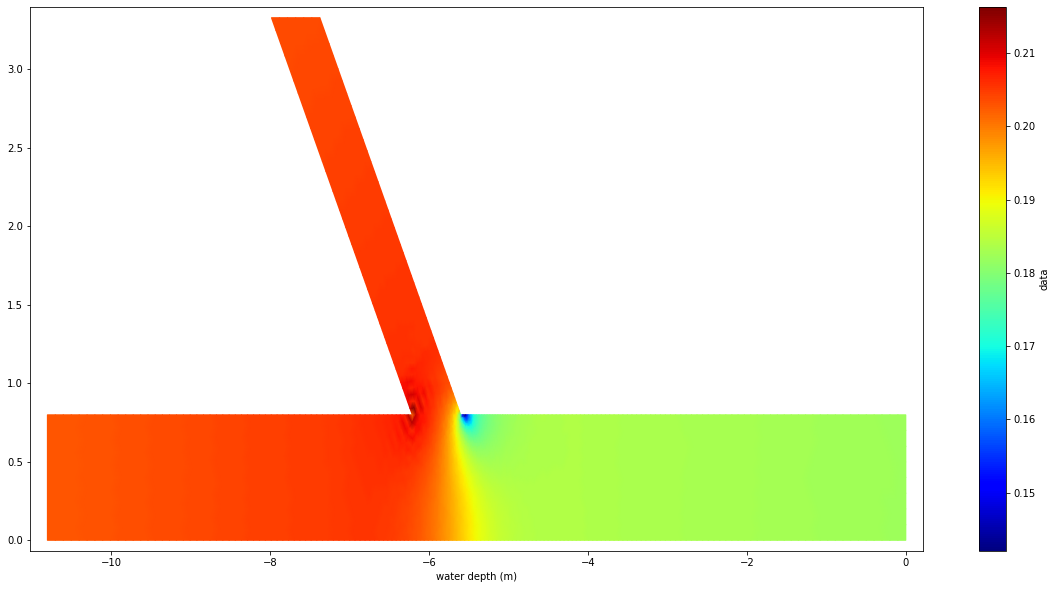

In [8]:
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map

# Initialising matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

data = res.get_data_value('WATER DEPTH', 1)

# Plotting scalar map
plot2d_scalar_map(fig, ax, res.tri, data, 'water depth (m)')
    
# Showing the plot
plt.show()

Then, define one line as an array of np.array elements (required for the interpolation, check the Doxygen documentation of the script data_manip.extraction.telemac_file.py for more details). 

Beware to create a line with points that are inside the domain, as much as possible. 
Placing the points far from the mesh will lead to some errors in the integral computation (the more
so with coarse polyline discretisations).

In this example the two points are not exactly inside the domain due to machine accuracy. 
However, the script detects nan values of the water depth at the initial state, which corresponds
to points that are outside the domain. Then, it replaces the nan values for all time frames 
with zeros at these points. This means that on the segment with one point inside the domain and 
one point outside the domain, the integral is calculated as:
H_int * length_segment
where H_int is the water depth on the point inside the domain and length_segment is the length of the segment, not reduced due to the fact that one point is actually outside the domain.

We also define the number of segments to be used for the discretisation of the line (line_num).

In [9]:
line = [np.array([-1.,0.0]),np.array([-1.,0.8])]
line_num = [20]

Get the water depth values over time for each discretized points of the polyline.

In [10]:
line_discrete, line_abs_curv, water_depth = res.get_timeseries_on_polyline('WATER DEPTH',line,line_num)

Now compute the area of the wet section:

In [11]:
area = wet_area_2d(line_discrete, water_depth)

The result is:

In [12]:
print("At time", times[0], "s, the area of the wet section at x = -1. m is", area[0], "m2")
print("At time", times[1], "s, the area of the wet section at x = -1. m is", area[1], "m2")

At time 0.0 s, the area of the wet section at x = -1. m is 0.1449356473043919 m2
At time 100.0 s, the area of the wet section at x = -1. m is 0.1460686600567878 m2
